# Descente de gradient

In [1]:
import numpy as np

def step_grad(grad_f,x,alpha):
    return np.array(x) - alpha * np.array(grad_f(x))

def descente_scalar(f,grad_f,x0=0,nb_it=1e5,alpha=1e-1):
    x = x0
    while (nb_it > 0):
        x = step_grad(grad_f,x,alpha)
        nb_it += -1
    return x,f(x)

def descente(f,grad_f,x0,nb_it=1e3,alpha=1e-1):
    x = np.array(x0)
    while (nb_it > 0):
        x = step_grad(grad_f,x,alpha)
        nb_it += -1
    return x,f(x)

def F(x):
    return x**2 + 10 * np.sin(x)

def grad_F(x):
    return 2 * x + 10 * np.cos(x)

def G(x):
    return F(x[0]) + F(x[1])

def grad_G(x):
    return [grad_F(x[0]),grad_F(x[1])]

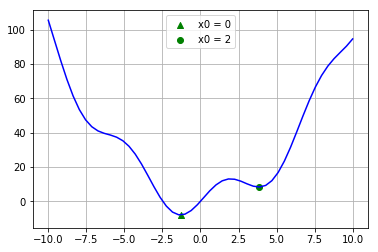

min :  (-1.306440008369511, -7.945823375615283) 
 et (3.837467106499049, 8.315585579477458)


In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10)
min1 = descente_scalar(F,grad_F)
min2 = descente_scalar(F,grad_F,x0=2)

plt.figure()
plt.plot(x,F(x),color='blue')
plt.scatter(min1[0],min1[1],color='green',
            marker='^',label="x0 = 0")
plt.scatter(min2[0],min2[1],color='green',
            marker='o',label="x0 = 2")
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

print('min : ', min1, '\n et', min2)

Si F n'est pas convexe on se retrouve dans ces cas où il y a des minimums locaux. Ce n'est pas grave si on ne tombe pas à chaque fois sur le minimum global. L'idée est de trouver un minimum qui n'est pas loin de ce dernier sans forcément faire en sorte de le trouver à chaque fois : On évite le sur-apprentissage. Même si l'algorithme est très sensible à sa valeur initiale!

min . : (array([-1.30644001, -1.30644001]), -15.891646751230565) 
 min x : (array([ 3.83746711, -1.30644001]), 0.36976220386217573)


/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


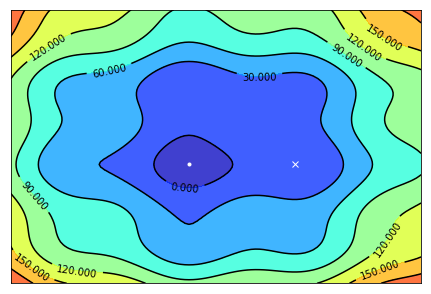

In [3]:
from scipy import optimize

res1 = descente(G, grad_G, x0=[-1,0])
res2 = descente(G, grad_G, x0=[2,0])
print('min . :',res1,'\n','min x :',res2)

from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-10,10,1e2)
Y = np.linspace(-10,10,1e2)
X, Y = np.meshgrid(X,Y)
Z = G([X, Y])

plt.figure()
plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, Z, 8, alpha=.75, cmap=plt.cm.jet)
C = plt.contour(X, Y, Z, 8, colors='black')
plt.clabel(C, inline=1, fontsize=10)
plt.plot(res1[0][0], res1[0][1], 'w.')
plt.plot(res2[0][0], res2[0][1], 'wx')
plt.xticks(())
plt.yticks(())
plt.show()

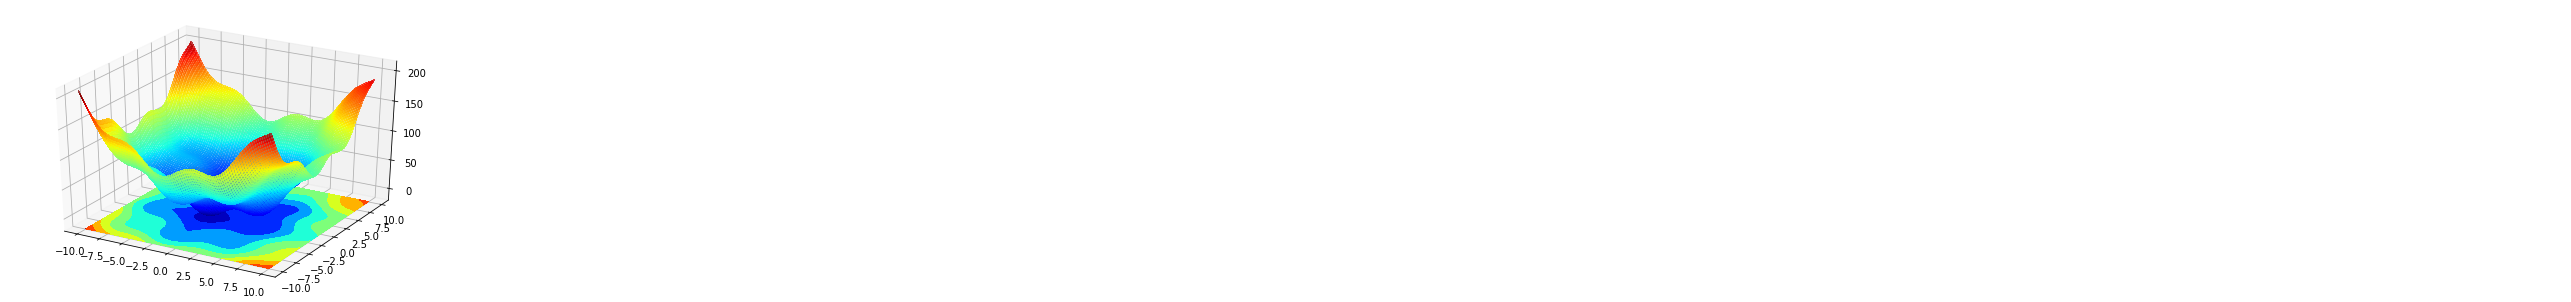

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, alpha=.75,
                cmap=plt.cm.jet,antialiased=False)
ax.contourf(X,Y,Z,8,cmap=plt.cm.jet, zdir='z', offset=-20)
plt.show()

# Perceptron

In [5]:
import numpy as np

def h(x):
    if x<0:
        return -1
    else:
        return 1
    
def F(w,x):
    return np.dot(w,x)

In [6]:
def cost(w,x,y):
    return .5*(y - F(w,x))**2

def grad_cost(w,x,y):
    return (y - F(w,x)) * np.array(x)

Vecteur des poids par algo. des moindres carrés

In [7]:
import matplotlib.pyplot as plt

def init_biais(data):
    n,d = data.shape
    ones = np.ones((n,1))
    data_biais = np.concatenate([ones,data],axis=1)
    return data_biais

def update_weights(weights,data,labels,alpha):
    err = 0
    n = len(labels)
    for i in range(n):
        x,y = data[i],labels[i]
        err += cost(weights,x,y)
        if y*F(weights,x) <= 0: 
            weights += alpha * grad_cost(weights,x,y)
    return weights,err/n
    
def train(data0,labels,alpha=1e-3,eps=1e-9, max_it=1e2,show_err=False):
    converged = False
    data = init_biais(data0)
    weights = np.zeros(len(data[0]))
    it_count = 0
    glob_err = []
    err_old = 0
    
    while not converged and it_count < max_it :
        weights,err = update_weights(weights,data,labels,alpha)
        converged = abs(err - err_old) < eps        
        err_old = err
        glob_err.append(err)
        it_count += 1
    
    if show_err:
        return weights,glob_err
    else:
        return weights
    
def predict(data0,weights):
    data = np.insert(data0,0,1)
    return h(F(weights,data))

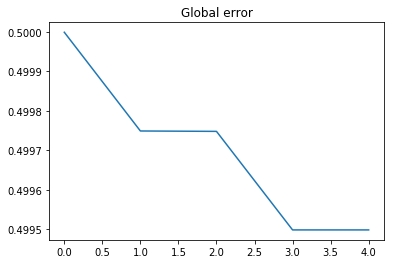

In [8]:
data = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
labels = np.array([-1,1,1,1])

weights,Err = train(data,labels,show_err=True)
plt.figure()
plt.plot(Err)
plt.title('Global error')
plt.show()

In [9]:
weights, predict([0,0],weights)

(array([-0.000998,  0.001001,  0.001001]), -1)

In [10]:
def plot_perceptron(data,labels):
    plt.scatter(data0[:,0], data0[:,1], marker="x", color="r", s=100)
    plt.scatter(data1[:,0], data1[:,1], marker="*", color="b", s=100)
    x0 = 0
    y0 = -weights[0]/weights[1]
    x1 = -weights[0]/weights[2]
    y1 = 0
    a = (y1 - y0) / (x1 - x0)
    b = y0
    plt.plot([-10, +10], [-10 * a + b, +10 * a + b], color="g")
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.show()

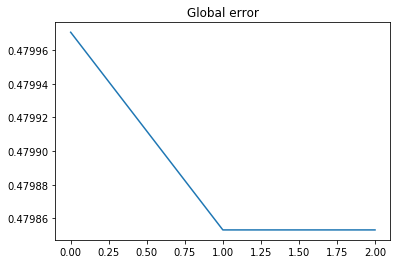

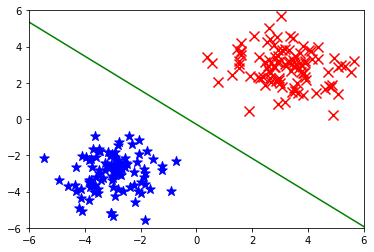

In [11]:
n,d = 100,2
data0 = np.random.randn(n, d) + 3
data1 = np.random.randn(n, d) - 3
labels0 = np.ones((n,1))
labels1 = -np.ones((n,1))

data = np.concatenate([data0, data1])
labels = np.concatenate([labels0, labels1])

weights,Err = train(data,labels,show_err=True)
plt.figure()
plt.plot(Err)
plt.title('Global error')
plt.show()
plt.figure()
plot_perceptron(data,labels)

In [12]:
def load_file(path):
    raw = np.loadtxt(path)
    labels = raw[:, 0] # Première colonne: chiffre
    data = raw[:, 1:] # Deuxième colonne: pixels de l'image return data, labels
    return data, labels
    
data, labels = load_file("./zip.train.gz")
data.shape

data_test, labels_test = load_file("./zip.test.gz")

data_test.shape

(2007, 256)

0
  Score (train) 0.993416540940886
  Score (test) 0.9820627802690582
1
  Score (train) 0.9925936085584968
  Score (test) 0.9865470852017937
2
  Score (train) 0.9773693594842957
  Score (test) 0.9571499750871948
3
  Score (train) 0.9843642847346044
  Score (test) 0.9681116093672147
4
  Score (train) 0.9761349609107118
  Score (test) 0.9621325361235675
5
  Score (train) 0.9753120285283225
  Score (test) 0.9626307922272048
6
  Score (train) 0.9838156631463448
  Score (test) 0.9805680119581465
7
  Score (train) 0.9925936085584968
  Score (test) 0.98903836571998
8
  Score (train) 0.9805239336167878
  Score (test) 0.9611360239162929
9
  Score (train) 0.9806610890138527
  Score (test) 0.9725959142999502


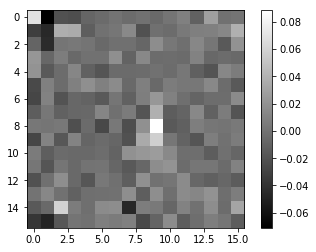

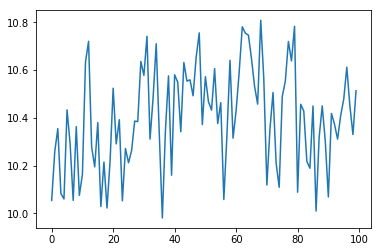

In [13]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model.perceptron import Perceptron
from sklearn.metrics import accuracy_score

import usps
import perceptron # Pour la fonction two_classes

for k in range(10):
    labels_k = perceptron.two_classes(labels, k)
    net = Perceptron()
    net.fit(data, labels_k)
    output_train = net.predict(data)
    output_test  = net.predict(data_test)
    
    print(k)
    print("  Score (train)", accuracy_score(labels_k, output_train))
    labels_k_test = perceptron.two_classes(labels_test, k)
    print("  Score (test)", accuracy_score(labels_k_test, output_test))

weights,errors = train(data,labels,show_err=True)
plt.figure()
plt.clf()
plt.imshow(weights[:-1].reshape((16, 16)), cmap=plt.cm.gray)
plt.colorbar()
plt.show()
plt.plot(errors)
plt.show()